<a href="https://colab.research.google.com/github/Jiya17Jain/Brain-tumor-detection-using-CNN-GRU/blob/main/cnn_gru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
!pip install -q kaggle
!mkdir ~/.kaggle
!cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset
!unzip -q brain-tumor-mri-dataset.zip -d brain_mri

Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0


In [ ]:
import os

base_dir = '/content/brain_mri'
train_dir = os.path.join(base_dir, 'Training')
validation_dir = os.path.join(base_dir, 'Testing')

classes = ['glioma', 'meningioma', 'pituitary', 'notumor']

print("Training Data Distribution:")
for cls in classes:
    class_path = os.path.join(train_dir, cls)
    if os.path.exists(class_path):
        print(f"{cls}: {len(os.listdir(class_path))} images")

print("\nValidation Data Distribution:")
for cls in classes:
    class_path = os.path.join(validation_dir, cls)
    if os.path.exists(class_path):
        print(f"{cls}: {len(os.listdir(class_path))} images")


Training Data Distribution:
glioma: 1321 images
meningioma: 1339 images
pituitary: 1457 images
notumor: 1595 images

Validation Data Distribution:
glioma: 300 images
meningioma: 306 images
pituitary: 300 images
notumor: 405 images


In [ ]:
# Third cell
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalization function
def normalize_mri(image):
    return (image / 127.5) - 1.0  # Scale to [-1, 1]

# Data generators
train_datagen = ImageDataGenerator(
    preprocessing_function=normalize_mri,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(preprocessing_function=normalize_mri)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Replace 'test_dir' with 'validation_dir'
test_generator = test_datagen.flow_from_directory(
    validation_dir, # This line was changed
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
# Fourth cell
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GRU, Dense, Reshape, Flatten

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Reshape((26*26, 128)),
    GRU(64, return_sequences=True),
    GRU(32),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 676, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 676, 64)             │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144,644 (565.02 KB)

 Trainable params: 144,644 (565.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fifth cell
import tensorflow as tf # Import tensorflow

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=50), # Now tf is defined and can be used
        tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.3533 - loss: 1.2985

179/179 ━━━━━━━━━━━━━━━━━━━━ 95s 457ms/step - accuracy: 0.3536 - loss: 1.2981 - val_accuracy: 0.4699 - val_loss: 1.1715
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.5082 - loss: 1.0312

179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 451ms/step - accuracy: 0.5083 - loss: 1.0311 - val_accuracy: 0.5164 - val_loss: 1.0544
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.5877 - loss: 0.9333

179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 447ms/step - accuracy: 0.5878 - loss: 0.9332 - val_accuracy: 0.5973 - val_loss: 0.8854
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.6399 - loss: 0.8511

179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 447ms/step - accuracy: 0.6402 - loss: 0.8507 - val_accuracy: 0.7407 - val_loss: 0.6630
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 452ms/step - accuracy: 0.7460 - loss: 0.6569 - val_accuracy: 0.7109 - val_loss: 0.7176
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.8133 - loss: 0.5009

179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 448ms/step - accuracy: 0.8133 - loss: 0.5009 - val_accuracy: 0.8032 - val_loss: 0.5103
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 455ms/step - accuracy: 0.8349 - loss: 0.4463 - val_accuracy: 0.7811 - val_loss: 0.6288
Epoch 8/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.8535 - loss: 0.3814

179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 455ms/step - accuracy: 0.8536 - loss: 0.3813 - val_accuracy: 0.8589 - val_loss: 0.3807
Epoch 9/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 466ms/step - accuracy: 0.8694 - loss: 0.3534 - val_accuracy: 0.8253 - val_loss: 0.4345
Epoch 10/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.8846 - loss: 0.3185

179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 446ms/step - accuracy: 0.8846 - loss: 0.3184 - val_accuracy: 0.8780 - val_loss: 0.3255
Epoch 11/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 447ms/step - accuracy: 0.8983 - loss: 0.2832 - val_accuracy: 0.8688 - val_loss: 0.3319
Epoch 12/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.8966 - loss: 0.2604

179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 451ms/step - accuracy: 0.8966 - loss: 0.2604 - val_accuracy: 0.8810 - val_loss: 0.3161
Epoch 13/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 442ms/step - accuracy: 0.9271 - loss: 0.2077 - val_accuracy: 0.8604 - val_loss: 0.3582
Epoch 14/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.9198 - loss: 0.2138

179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 460ms/step - accuracy: 0.9198 - loss: 0.2138 - val_accuracy: 0.8856 - val_loss: 0.2956
Epoch 15/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.9276 - loss: 0.2130

179/179 ━━━━━━━━━━━━━━━━━━━━ 86s 479ms/step - accuracy: 0.9277 - loss: 0.2129 - val_accuracy: 0.8894 - val_loss: 0.2793
Epoch 16/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.9242 - loss: 0.2019

179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 456ms/step - accuracy: 0.9242 - loss: 0.2019 - val_accuracy: 0.9283 - val_loss: 0.1851
Epoch 17/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 85s 474ms/step - accuracy: 0.9316 - loss: 0.1795 - val_accuracy: 0.8940 - val_loss: 0.2650
Epoch 18/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 453ms/step - accuracy: 0.9360 - loss: 0.1894 - val_accuracy: 0.8818 - val_loss: 0.3203
Epoch 19/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 457ms/step - accuracy: 0.9405 - loss: 0.1619 - val_accuracy: 0.9237 - val_loss: 0.2036
Epoch 20/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 456ms/step - accuracy: 0.9422 - loss: 0.1681 - val_accuracy: 0.9245 - val_loss: 0.2101
Epoch 21/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 104s 582ms/step - accuracy: 0.9459 - loss: 0.1495 - val_accuracy: 0.9169 - val_loss: 0.2186
Epoch 22/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 87s 484ms/step - accuracy: 0.9525 - loss: 0.1403 - val_accuracy: 0.9115 - val_loss: 0.2537
Epoch 23/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 90s 503ms/step - accuracy: 0.9514 - loss: 0.14

179/179 ━━━━━━━━━━━━━━━━━━━━ 85s 477ms/step - accuracy: 0.9476 - loss: 0.1510 - val_accuracy: 0.9428 - val_loss: 0.1683
Epoch 25/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9516 - loss: 0.1297

179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 454ms/step - accuracy: 0.9516 - loss: 0.1297 - val_accuracy: 0.9603 - val_loss: 0.1259
Epoch 26/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 460ms/step - accuracy: 0.9607 - loss: 0.1158 - val_accuracy: 0.9268 - val_loss: 0.1963
Epoch 27/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9576 - loss: 0.1223

179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 466ms/step - accuracy: 0.9576 - loss: 0.1223 - val_accuracy: 0.9573 - val_loss: 0.1168
Epoch 28/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 449ms/step - accuracy: 0.9601 - loss: 0.1088 - val_accuracy: 0.8924 - val_loss: 0.3056
Epoch 29/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.9578 - loss: 0.1193

179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 450ms/step - accuracy: 0.9578 - loss: 0.1193 - val_accuracy: 0.9695 - val_loss: 0.0930
Epoch 30/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 464ms/step - accuracy: 0.9614 - loss: 0.1055 - val_accuracy: 0.9161 - val_loss: 0.2399
Epoch 31/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 450ms/step - accuracy: 0.9617 - loss: 0.1065 - val_accuracy: 0.9436 - val_loss: 0.1610
Epoch 32/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 449ms/step - accuracy: 0.9718 - loss: 0.0838 - val_accuracy: 0.9184 - val_loss: 0.2402
Epoch 33/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 448ms/step - accuracy: 0.9601 - loss: 0.1155 - val_accuracy: 0.9573 - val_loss: 0.1379
Epoch 34/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 457ms/step - accuracy: 0.9651 - loss: 0.1010 - val_accuracy: 0.9321 - val_loss: 0.1931
Epoch 35/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 444ms/step - accuracy: 0.9679 - loss: 0.0852 - val_accuracy: 0.9466 - val_loss: 0.1336
Epoch 36/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 455ms/step - accuracy: 0.9766 - loss: 0.067

179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 451ms/step - accuracy: 0.9743 - loss: 0.0772 - val_accuracy: 0.9695 - val_loss: 0.0927
Epoch 38/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 451ms/step - accuracy: 0.9771 - loss: 0.0643 - val_accuracy: 0.9268 - val_loss: 0.2113
Epoch 39/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 439ms/step - accuracy: 0.9771 - loss: 0.0649 - val_accuracy: 0.9603 - val_loss: 0.0969
Epoch 40/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 443ms/step - accuracy: 0.9756 - loss: 0.0643 - val_accuracy: 0.9596 - val_loss: 0.1100
Epoch 41/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.9786 - loss: 0.0579

179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 454ms/step - accuracy: 0.9786 - loss: 0.0579 - val_accuracy: 0.9710 - val_loss: 0.0753
Epoch 42/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 456ms/step - accuracy: 0.9780 - loss: 0.0668 - val_accuracy: 0.9603 - val_loss: 0.0973
Epoch 43/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 453ms/step - accuracy: 0.9715 - loss: 0.0800 - val_accuracy: 0.9474 - val_loss: 0.1443
Epoch 44/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 461ms/step - accuracy: 0.9783 - loss: 0.0591 - val_accuracy: 0.9550 - val_loss: 0.1289
Epoch 45/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 86s 483ms/step - accuracy: 0.9740 - loss: 0.0776 - val_accuracy: 0.9596 - val_loss: 0.1410
Epoch 46/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 452ms/step - accuracy: 0.9754 - loss: 0.0710 - val_accuracy: 0.9657 - val_loss: 0.1025
Epoch 47/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 461ms/step - accuracy: 0.9710 - loss: 0.0827 - val_accuracy: 0.9504 - val_loss: 0.1352
Epoch 48/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 456ms/step - accuracy: 0.9777 - loss: 0.070

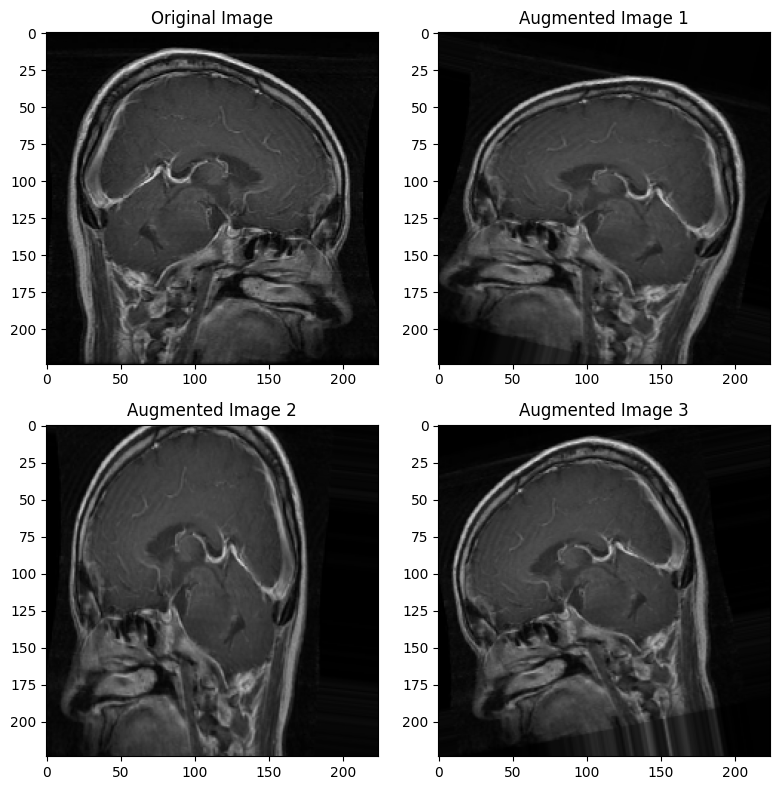

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Get a list of image files in the glioma directory
glioma_dir = '/content/brain_mri/Training/glioma'
image_files = [f for f in os.listdir(glioma_dir) if os.path.isfile(os.path.join(glioma_dir, f))]

# Check if there are any images in the directory
if image_files:
    # Load the first image found
    img_path = os.path.join(glioma_dir, image_files[0])
    img = load_img(img_path, target_size=(224, 224))

    # Convert the PIL Image to a NumPy array
    img_array = img_to_array(img)

    # Generate augmented images
    augmented_images = datagen.flow(img_array.reshape((1,) + img_array.shape), batch_size=1)

    # Plot original and augmented images
    plt.figure(figsize=(8, 8))

    # Original image
    plt.subplot(2, 2, 1)
    # Display the image using the NumPy array (img_array)
    plt.imshow(img_array / 255.0)  # Divide NumPy array by 255.0 for normalization
    plt.title("Original Image")

    # Augmented images
    for i in range(3):
        batch = next(augmented_images)
        plt.subplot(2, 2, i + 2)
        plt.imshow(batch[0] / 255.0)
        plt.title(f"Augmented Image {i + 1}")

    plt.tight_layout()
    plt.show()
else:
    print("No images found in the glioma directory.")

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# ... (Your existing code to load and preprocess data) ...

# Get predictions from the model for the test set
y_pred_probs = model.predict(test_generator)  # Get predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Get true labels for the test set
y_true = test_generator.classes  # Assuming your test_generator has 'classes' attribute

# Get class names
class_names = list(test_generator.class_indices.keys())

# Generate and print the classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step
              precision    recall  f1-score   support

      glioma       0.27      0.25      0.26       300
  meningioma       0.23      0.23      0.23       306
     notumor       0.31      0.32      0.31       405
   pituitary       0.25      0.26      0.25       300

    accuracy                           0.27      1311
   macro avg       0.26      0.26      0.26      1311
weighted avg       0.27      0.27      0.27      1311



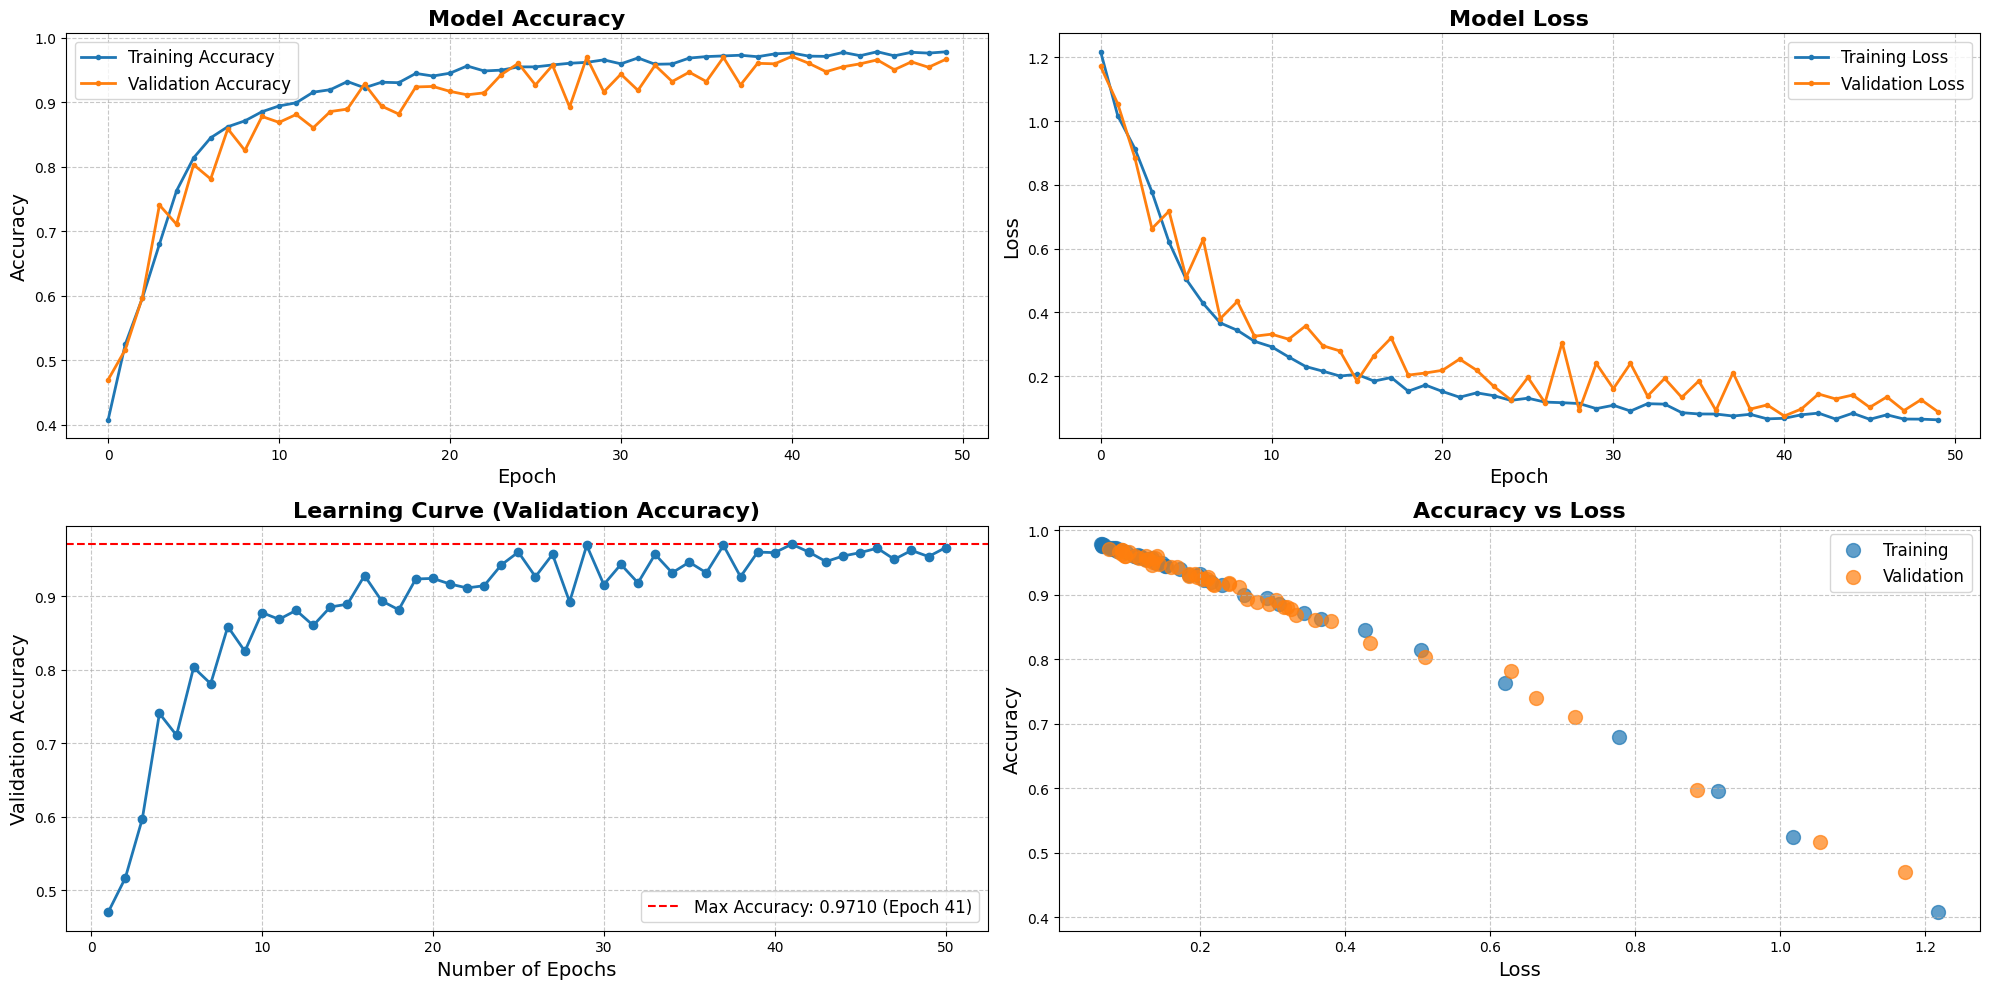

In [ ]:
# Enhanced visualization code
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot enhanced training history
def plot_enhanced_training_history(history):
    # Create figure
    plt.figure(figsize=(20, 10))

    # Plot accuracy
    plt.subplot(2, 2, 1)
    plt.plot(history.history['accuracy'], linewidth=2, marker='o', markersize=3, label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], linewidth=2, marker='o', markersize=3, label='Validation Accuracy')
    plt.title('Model Accuracy', fontsize=16, fontweight='bold')
    plt.ylabel('Accuracy', fontsize=14)
    plt.xlabel('Epoch', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)

    # Plot loss
    plt.subplot(2, 2, 2)
    plt.plot(history.history['loss'], linewidth=2, marker='o', markersize=3, label='Training Loss')
    plt.plot(history.history['val_loss'], linewidth=2, marker='o', markersize=3, label='Validation Loss')
    plt.title('Model Loss', fontsize=16, fontweight='bold')
    plt.ylabel('Loss', fontsize=14)
    plt.xlabel('Epoch', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)

    # Plot learning curve (val_accuracy vs. training set size)
    plt.subplot(2, 2, 3)
    max_acc = max(history.history['val_accuracy'])
    max_acc_epoch = history.history['val_accuracy'].index(max_acc)
    plt.axhline(y=max_acc, color='r', linestyle='--',
               label=f'Max Accuracy: {max_acc:.4f} (Epoch {max_acc_epoch+1})')

    plt.plot(range(1, len(history.history['val_accuracy'])+1),
             history.history['val_accuracy'], 'o-', linewidth=2)
    plt.title('Learning Curve (Validation Accuracy)', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Epochs', fontsize=14)
    plt.ylabel('Validation Accuracy', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)

    # Plot accuracy vs loss
    plt.subplot(2, 2, 4)
    plt.scatter(history.history['loss'], history.history['accuracy'],
                label='Training', alpha=0.7, s=100)
    plt.scatter(history.history['val_loss'], history.history['val_accuracy'],
                label='Validation', alpha=0.7, s=100)
    plt.title('Accuracy vs Loss', fontsize=16, fontweight='bold')
    plt.xlabel('Loss', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)

    # Show the plots
    plt.tight_layout()

    # Save the figure if needed (optional)
    #plt.savefig('training_history.png', dpi=300)

    # Display the plots
    plt.show()

# Function to generate and plot confusion matrix
def plot_confusion_matrix(generator, model):
    # Get class names
    class_names = list(generator.class_indices.keys())

    # Get predictions
    y_pred = []
    y_true = []

    # Reset the generator to ensure correct order of predictions
    generator.reset()

    # Get true labels and predictions
    for i in range(len(generator)):
        x_batch, y_batch = next(generator)  # Get a batch of images and labels
        y_batch_pred = model.predict(x_batch)  # Predict on the batch
        y_pred.extend(np.argmax(y_batch_pred, axis=1))  # Store predicted classes
        y_true.extend(np.argmax(y_batch, axis=1))  # Store true classes

    # Create confusion matrix
    cm = confusion_matrix(y_true[:len(y_pred)], y_pred[:len(y_pred)])

    # Normalize confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot confusion matrices
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))

    # Plot raw counts
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names,
                yticklabels=class_names, ax=ax1)

    ax1.set_xlabel('Predicted', fontsize=14)
    ax1.set_ylabel('True', fontsize=14)
    ax1.set_title('Confusion Matrix (Counts)', fontsize=16)


     # Plot normalized percentages
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
                 xticklabels=class_names,
                 yticklabels=class_names,
                 ax=ax2)

    ax2.set_xlabel('Predicted', fontsize=14)
    ax2.set_ylabel('True', fontsize=14)
    ax2.set_title('Confusion Matrix (Normalized)', fontsize=16)

     # Show the plots
    plt.tight_layout()
     # Save the figure if needed (optional)
     #plt.savefig('confusion_matrix.png', dpi=300)

     # Display the plots
    plt.show()

     # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true[:len(y_pred)], y_pred[:len(y_pred)], target_names=class_names))

# Usage instructions:
# After training your model and obtaining the `history` object:
# plot_enhanced_training_history(history)

# For confusion matrix visualization:
# Ensure you have a test_generator set up as follows:
# test_generator = ImageDataGenerator(preprocessing_function=<your_preprocessing_function>).flow_from_directory(
#     validation_dir,
#     target_size=(224, 224),
#     batch_size=<your_batch_size>,
#     class_mode='categorical',
#     shuffle=False  # Important for correct predictions order in confusion matrix!
# )
# Then call:
# plot_confusion_matrix(test_generator, model)
plot_enhanced_training_history(history)


In [ ]:
test_generator = ImageDataGenerator(preprocessing_function=normalize_mri).flow_from_directory( # Assuming 'normalize_mri' is your preprocessing function
    validation_dir,
    target_size=(224, 224),
    batch_size=32,  # Replace with your desired batch size
    class_mode='categorical',
    shuffle=False  # Important for correct predictions order in confusion matrix!
)

Found 1311 images belonging to 4 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━

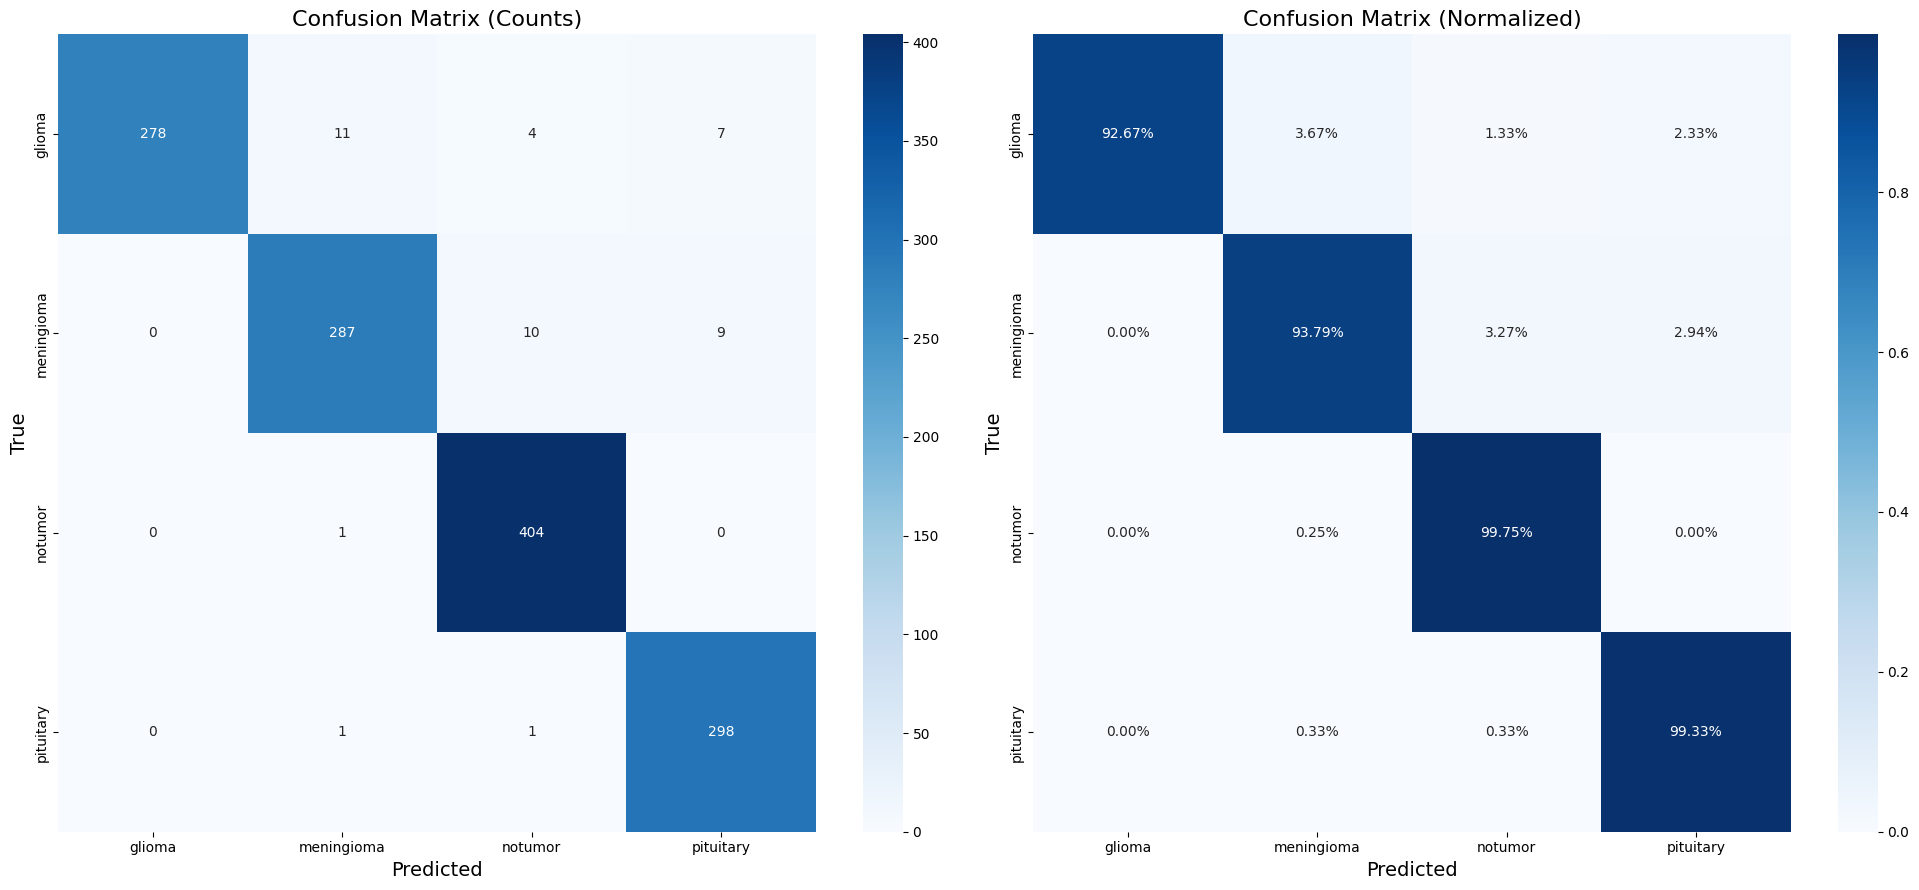


Classification Report:
              precision    recall  f1-score   support

      glioma       1.00      0.93      0.96       300
  meningioma       0.96      0.94      0.95       306
     notumor       0.96      1.00      0.98       405
   pituitary       0.95      0.99      0.97       300

    accuracy                           0.97      1311
   macro avg       0.97      0.96      0.97      1311
weighted avg       0.97      0.97      0.97      1311



In [ ]:
plot_confusion_matrix(test_generator, model)

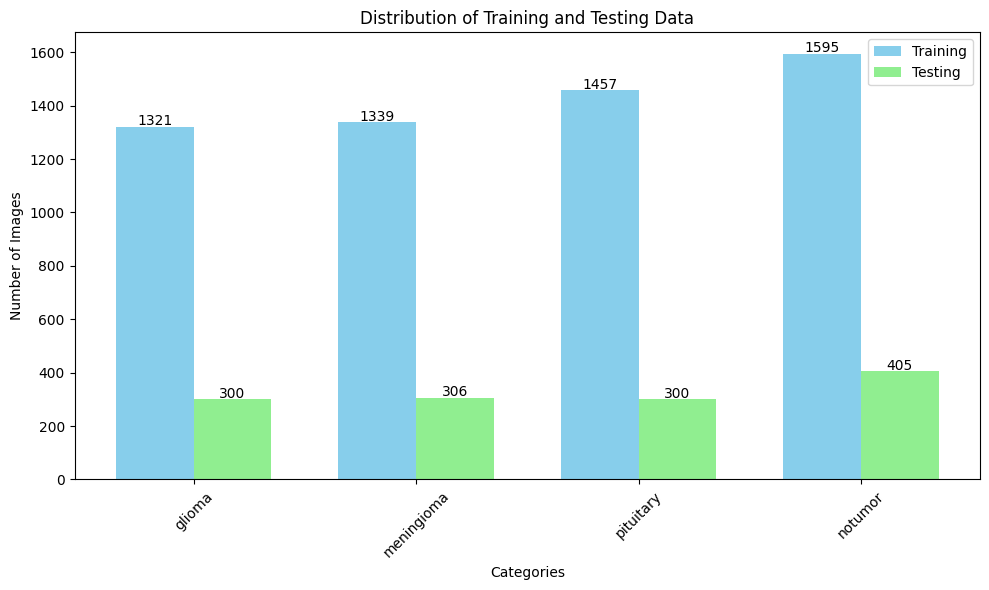

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Paths to training and testing directories
train_dir = '/content/brain_mri/Training'
validation_dir = '/content/brain_mri/Testing'
classes = ['glioma', 'meningioma', 'pituitary', 'notumor']

# Get counts for training data
train_counts = [len(os.listdir(os.path.join(train_dir, cls))) for cls in classes]

# Get counts for testing data
test_counts = [len(os.listdir(os.path.join(validation_dir, cls))) for cls in classes]

# Create a grouped bar chart
x = np.arange(len(classes))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, train_counts, width, label='Training', color='skyblue')
plt.bar(x + width/2, test_counts, width, label='Testing', color='lightgreen')

plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Training and Testing Data')
plt.xticks(x, classes, rotation=45)
plt.legend()

for i, v in enumerate(train_counts):
    plt.text(i - width/2, v + 5, str(v), ha='center')

for i, v in enumerate(test_counts):
    plt.text(i + width/2, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.utils import plot_model

# Save a PNG visualization of the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the PNG in Colab
from IPython.display import Image
Image(filename='model.png')


In [ ]:
!pip install netron

import netron

# Save the model to your desired location
model.save('/content/drive/MyDrive/brain_tumor_model.h5')

# Now launch Netron to visualize it
netron.start('/content/drive/MyDrive/brain_tumor_model.h5')

Serving '/content/drive/MyDrive/brain_tumor_model.h5' at http://localhost:8081


('localhost', 8081)

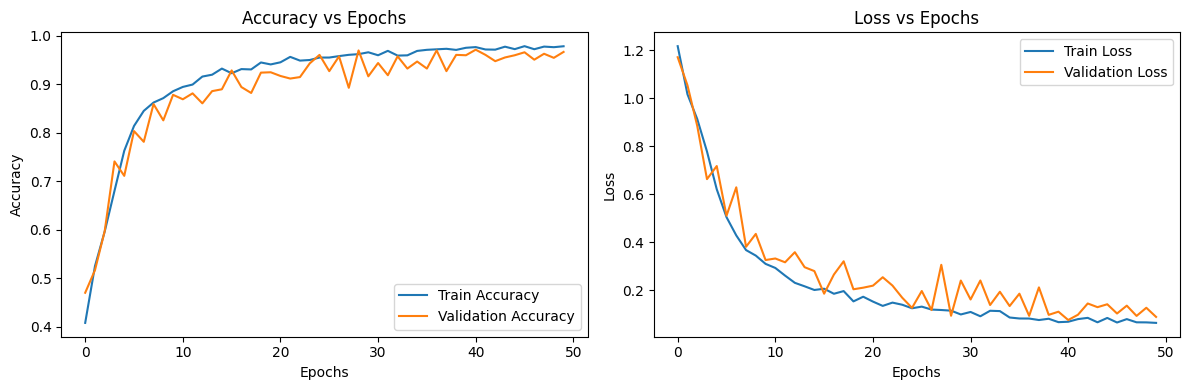

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


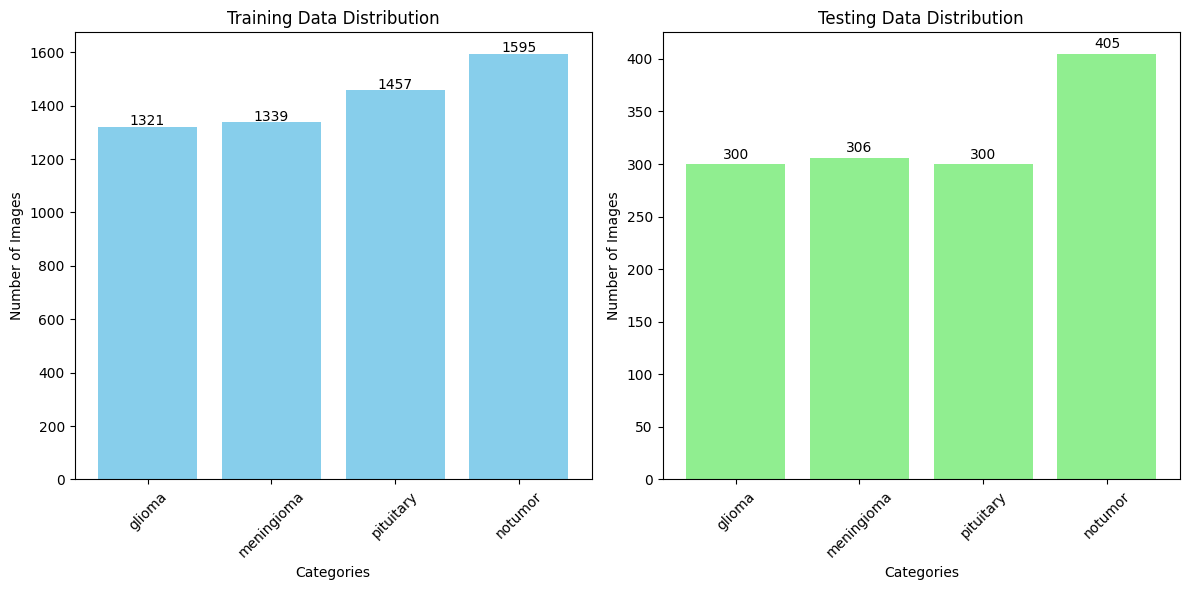

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Paths to the dataset directories
base_dir = '/content/brain_mri'
train_dir = os.path.join(base_dir, 'Training')
validation_dir = os.path.join(base_dir, 'Testing')
classes = ['glioma', 'meningioma', 'pituitary', 'notumor']

# Get counts for training data
train_counts = []
for cls in classes:
    class_path = os.path.join(train_dir, cls)
    if os.path.exists(class_path):
        train_counts.append(len(os.listdir(class_path)))
    else:
        train_counts.append(0)

# Get counts for testing data
test_counts = []
for cls in classes:
    class_path = os.path.join(validation_dir, cls)
    if os.path.exists(class_path):
        test_counts.append(len(os.listdir(class_path)))
    else:
        test_counts.append(0)

# Plot the distribution of categories
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(classes, train_counts, color='skyblue')
plt.title('Training Data Distribution')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

for i, v in enumerate(train_counts):
    plt.text(i, v + 5, str(v), ha='center')

plt.subplot(1, 2, 2)
plt.bar(classes, test_counts, color='lightgreen')
plt.title('Testing Data Distribution')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

for i, v in enumerate(test_counts):
    plt.text(i, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()


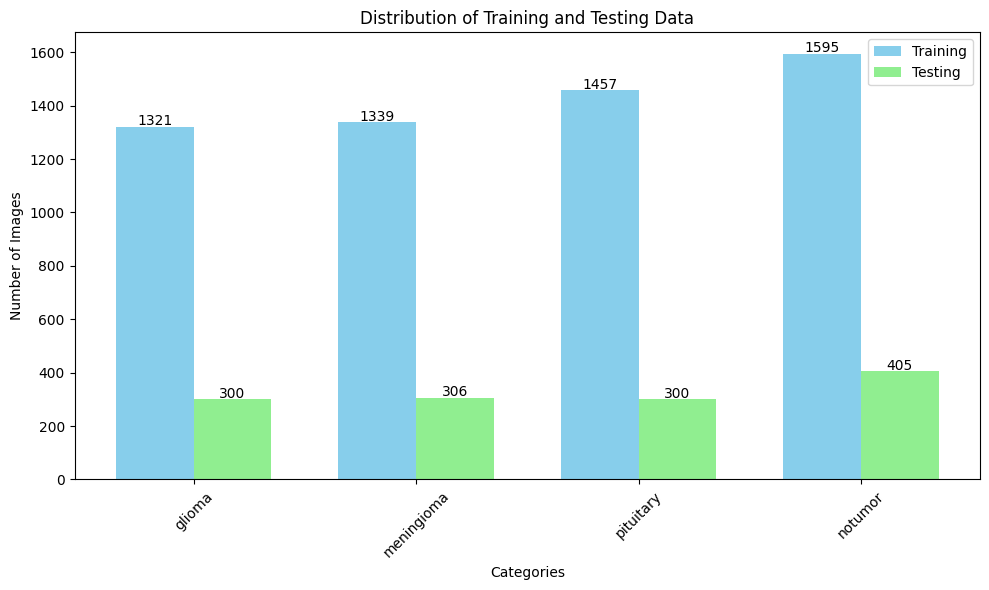

In [ ]:
# Create a grouped bar chart
x = np.arange(len(classes))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, train_counts, width, label='Training', color='skyblue')
plt.bar(x + width/2, test_counts, width, label='Testing', color='lightgreen')

plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Training and Testing Data')
plt.xticks(x, classes, rotation=45)
plt.legend()

# Add count labels on top of each bar
for i, v in enumerate(train_counts):
    plt.text(i - width/2, v + 5, str(v), ha='center')

for i, v in enumerate(test_counts):
    plt.text(i + width/2, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()


In [ ]:
# Save the model first
model.save('brain_tumor_model.h5')

# Install netron
!pip install netron

# Launch the interactive visualizer (will open in browser)
import netron
netron.start('brain_tumor_model.h5')


Serving 'brain_tumor_model.h5' at http://localhost:17298


('localhost', 17298)

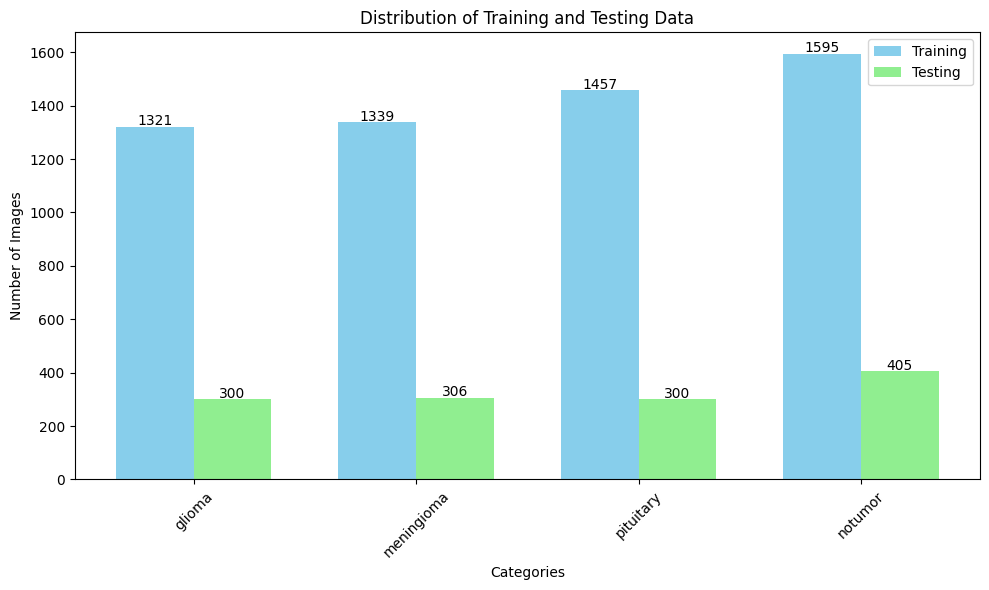

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Paths to training and testing directories
train_dir = '/content/brain_mri/Training'
validation_dir = '/content/brain_mri/Testing'
classes = ['glioma', 'meningioma', 'pituitary', 'notumor']

# Get counts for training data
train_counts = [len(os.listdir(os.path.join(train_dir, cls))) for cls in classes]

# Get counts for testing data
test_counts = [len(os.listdir(os.path.join(validation_dir, cls))) for cls in classes]

# Create a grouped bar chart
x = np.arange(len(classes))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, train_counts, width, label='Training', color='skyblue')
plt.bar(x + width/2, test_counts, width, label='Testing', color='lightgreen')

plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Training and Testing Data')
plt.xticks(x, classes, rotation=45)
plt.legend()

for i, v in enumerate(train_counts):
    plt.text(i - width/2, v + 5, str(v), ha='center')

for i, v in enumerate(test_counts):
    plt.text(i + width/2, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()


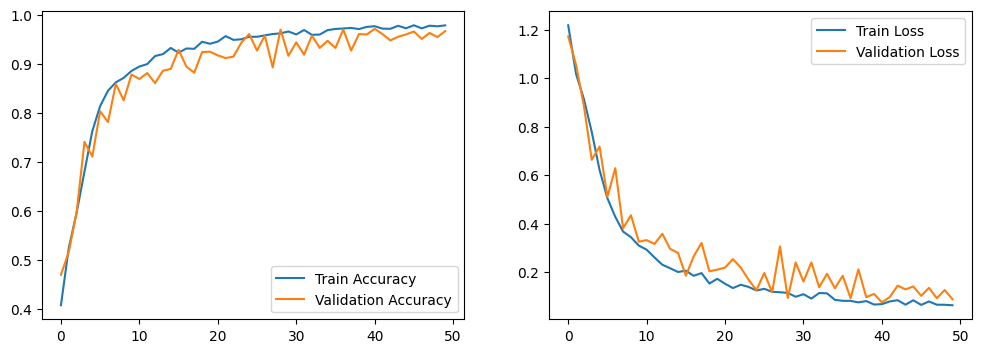

Final Validation Accuracy: 0.9664


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.9434 - loss: 0.1432
Test Loss: 0.0883
Test Accuracy: 0.9664


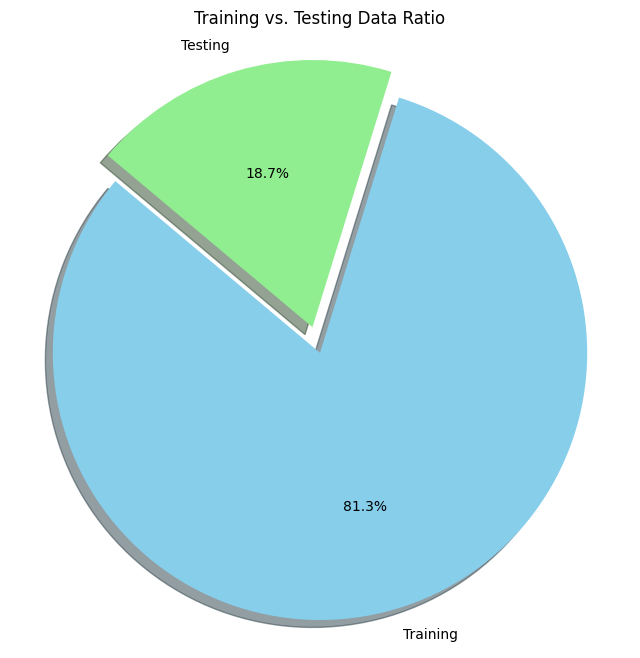

In [ ]:
import matplotlib.pyplot as plt
import os

# Define the paths to the training and testing directories
base_dir = '/content/brain_mri'
train_dir = os.path.join(base_dir, 'Training')
validation_dir = os.path.join(base_dir, 'Testing')

# Function to count images in a directory
def count_images(directory):
    total = 0
    for cls in os.listdir(directory):
        class_path = os.path.join(directory, cls)
        if os.path.isdir(class_path):
            total += len(os.listdir(class_path))
    return total

# Count the number of training and testing images
num_train_images = count_images(train_dir)
num_test_images = count_images(validation_dir)

# Calculate the total number of images
total_images = num_train_images + num_test_images

# Calculate the training and testing ratios
train_ratio = num_train_images / total_images
test_ratio = num_test_images / total_images

# Create the pie chart
labels = ['Training', 'Testing']
sizes = [train_ratio, test_ratio]
colors = ['skyblue', 'lightgreen']
explode = (0.1, 0)  # Explode the first slice (Training)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Training vs. Testing Data Ratio')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Found 1311 images belonging to 4 classes.
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step
Classification Report:
               precision    recall  f1-score   support

      glioma       1.00      0.93      0.96       300
  meningioma       0.96      0.94      0.95       306
     notumor       0.96      1.00      0.98       405
   pituitary       0.95      0.99      0.97       300

    accuracy                           0.97      1311
   macro avg       0.97      0.96      0.97      1311
weighted avg       0.97      0.97      0.97      1311



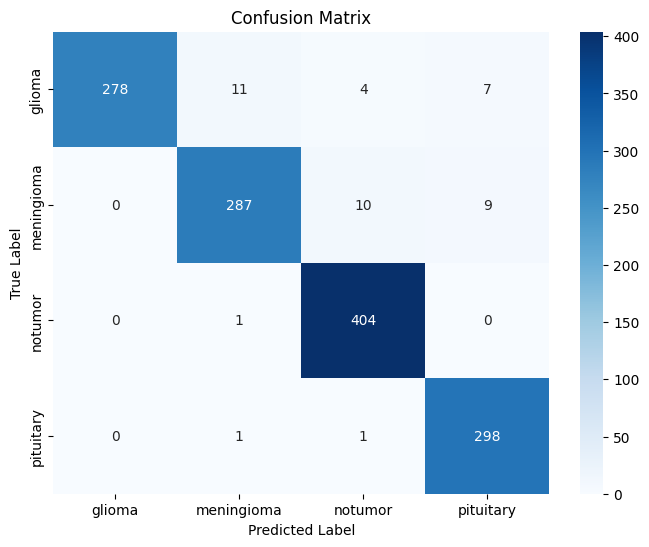

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the paths to the training and testing directories
base_dir = '/content/brain_mri'
validation_dir = os.path.join(base_dir, 'Testing')

# Get the test generator (assuming you have already defined it)
# It's important to set shuffle to False to ensure correct labels
test_datagen = ImageDataGenerator(preprocessing_function=normalize_mri)
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Crucial:  set shuffle to False
)

# Predict the classes for the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Get the class with highest probability

# Get the true class labels from the generator
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('brain_tumor_model.h5')
tf.saved_model.save(model, '/path/to/saved_model/1')
